In [125]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# 붓꽃 데이터 로드후 test_size=0.2

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.2,stratify=iris_dataset.target, random_state=42)

In [128]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 노드제한을 주지 않았을때

In [129]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [130]:
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.967


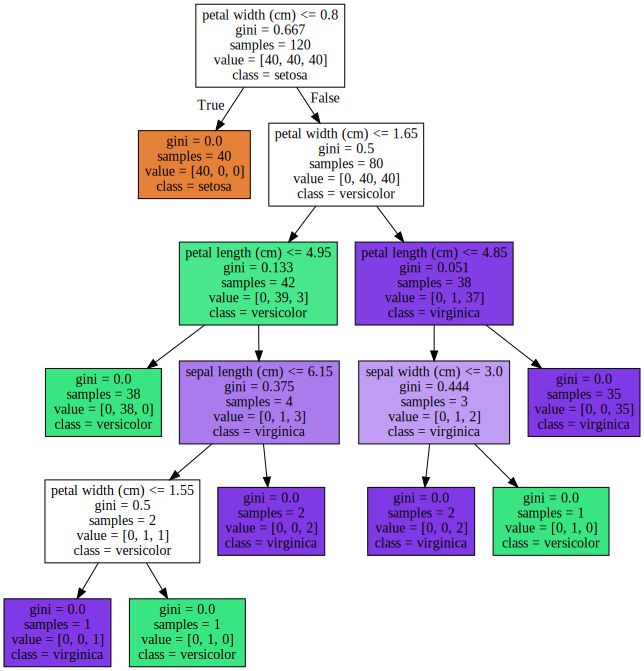

In [131]:
export_graphviz(tree, out_file="tree.dot",feature_names=iris_dataset.feature_names,class_names = ["setosa", "versicolor","virginica"], filled=True, impurity=True)
with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importances: 
[0.00625    0.01666667 0.0585683  0.91851504]
sepal length (cm):0.006
sepal width (cm):0.017
petal length (cm):0.059
petal width (cm):0.919


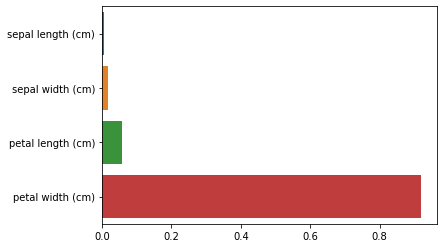

In [147]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances: \n{0}".format(tree.feature_importances_))
for name,value in zip(iris_dataset.feature_names,tree.feature_importances_):
    print("{0}:{1:.3f}".format(name,value))
sns.barplot(x=tree.feature_importances_,y=iris_dataset.feature_names)

# 사전 가지치기 max_depth = 3인 모델 시각화

In [135]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [136]:
print("훈련 세트 점수: {:.3f}".format(tree3.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree3.score(X_test, y_test)))

훈련 세트 점수: 0.983
테스트 세트 점수: 0.967


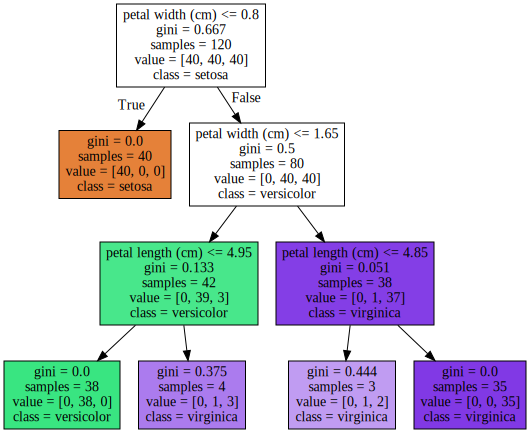

In [137]:
from sklearn.tree import export_graphviz
export_graphviz(tree3, out_file = "tree3.dot", class_names = ["setosa", "versicolor","virginica"],
               feature_names = iris_dataset.feature_names, impurity = True, filled = True)
import graphviz

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importances: 
[0.         0.         0.06071875 0.93928125]
sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.061
petal width (cm):0.939


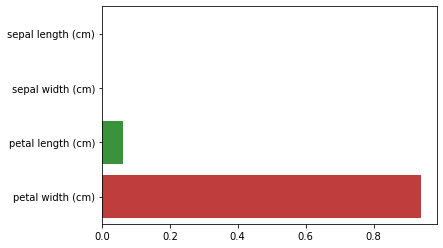

In [148]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances: \n{0}".format(tree3.feature_importances_))
for name,value in zip(iris_dataset.feature_names,tree3.feature_importances_):
    print("{0}:{1:.3f}".format(name,value))
sns.barplot(x=tree3.feature_importances_,y=iris_dataset.feature_names)

# 데이터 프레임 형식으로 한 코드

In [149]:
import pandas as pd
iris_dataset = load_iris()
iris_dataset_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_dataset_df['label'] = iris_dataset.target

In [151]:
y = iris_dataset_df['label'].values
X = iris_dataset_df.drop(['label'], axis=1).values

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=iris_dataset_df['label'])

In [143]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [144]:
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.967


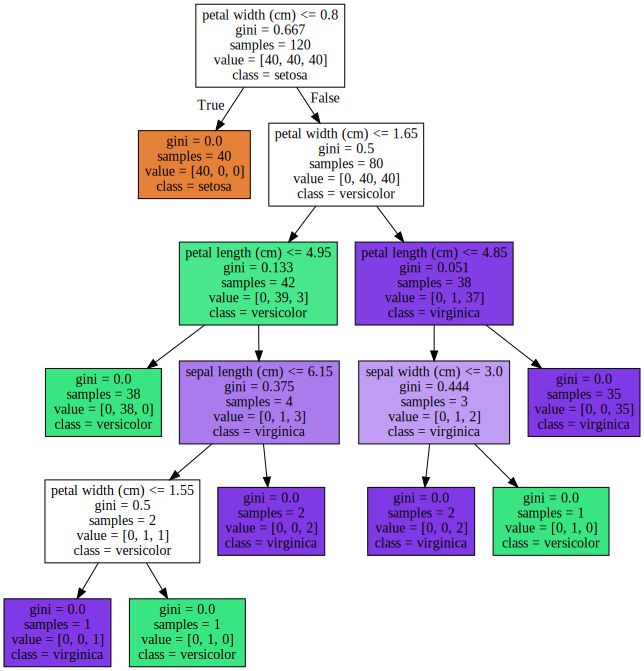

In [153]:
export_graphviz(tree, out_file="tree.dot",feature_names=iris_dataset_df.columns[0:4].array,class_names = ["setosa", "versicolor","virginica"], filled=True, impurity=True)
with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importances: 
[0.00625    0.01666667 0.0585683  0.91851504]
sepal length (cm):0.006
sepal width (cm):0.017
petal length (cm):0.059
petal width (cm):0.919


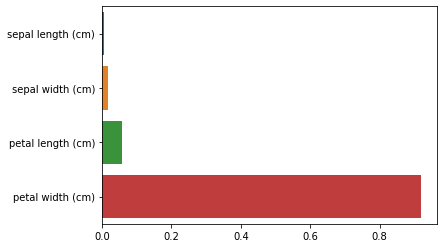

In [158]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances: \n{0}".format(tree.feature_importances_))
for name,value in zip(iris_dataset_df.columns[0:4],tree.feature_importances_):
    print("{0}:{1:.3f}".format(name,value))
sns.barplot(x=tree.feature_importances_,y=iris_dataset_df.columns[0:4])

# 사전 가지치기 max_depth = 3인 모델 시각화

In [116]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [118]:
print("훈련 세트 점수: {:.3f}".format(tree3.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree3.score(X_test, y_test)))

훈련 세트 점수: 0.983
테스트 세트 점수: 0.967


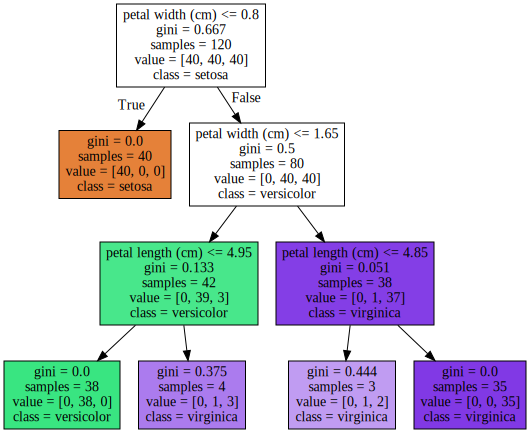

In [119]:
from sklearn.tree import export_graphviz
export_graphviz(tree3, out_file = "tree3.dot", class_names = ["setosa", "versicolor","virginica"],
               feature_names = iris_dataset.feature_names, impurity = True, filled = True)
import graphviz

with open("tree3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature importances: 
[0.         0.         0.06071875 0.93928125]
sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.061
petal width (cm):0.939


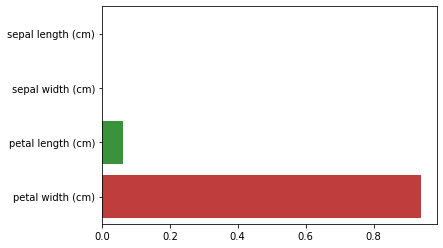

In [157]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances: \n{0}".format(tree3.feature_importances_))
for name,value in zip(iris_dataset_df.columns[0:4],tree3.feature_importances_):
    print("{0}:{1:.3f}".format(name,value))
sns.barplot(x=tree3.feature_importances_,y=iris_dataset_df.columns[0:4])